In [15]:
#importing required libraries
import numpy as np 
import pandas as pd 
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [16]:
data = pd.read_csv("CMC.csv")
print(data.head(10)) 

   age  edu_wife  edu_husband  children  religion  working  job_husband  \
0   24         2            3         3         1        1            2   
1   45         1            3        10         1        1            3   
2   43         2            3         7         1        1            3   
3   42         3            2         9         1        1            3   
4   36         3            3         8         1        1            3   
5   19         4            4         0         1        1            3   
6   38         2            3         6         1        1            3   
7   21         3            3         1         1        0            3   
8   27         2            3         3         1        1            3   
9   45         1            1         8         1        1            2   

   living_std  media  contraceptive  
0           3      0              1  
1           4      0              1  
2           4      0              1  
3           3      0  

In [17]:
data.describe()

,age,edu_wife,edu_husband,children,religion,working,job_husband,living_std,media,contraceptive
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,32.538357,2.958588,3.429735,3.261371,0.850645,0.749491,2.137814,3.133741,0.073999,1.919891
std,8.227245,1.014994,0.816349,2.358549,0.356559,0.433453,0.864857,0.976161,0.261858,0.876376
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,26.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,1.000000
50%,32.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000
75%,39.000000,4.000000,4.000000,4.000000,1.000000,1.000000,3.000000,4.000000,0.000000,3.000000
max,49.000000,4.000000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
age              1473 non-null int64
edu_wife         1473 non-null int64
edu_husband      1473 non-null int64
children         1473 non-null int64
religion         1473 non-null int64
working          1473 non-null int64
job_husband      1473 non-null int64
living_std       1473 non-null int64
media            1473 non-null int64
contraceptive    1473 non-null int64
dtypes: int64(10)
memory usage: 115.2 KB


In [19]:
data.dtypes

age              int64
edu_wife         int64
edu_husband      int64
children         int64
religion         int64
working          int64
job_husband      int64
living_std       int64
media            int64
contraceptive    int64
dtype: object

In [20]:
data.drop(['age', 'children'], axis = 1, inplace = True);

In [21]:
data.columns

Index(['edu_wife', 'edu_husband', 'religion', 'working', 'job_husband',
       'living_std', 'media', 'contraceptive'],
      dtype='object')


Contraceptive and Wife Education


The contingency (two-way frequency table) is given below

          no-use  long-term  short-term  rowtotal
low          103          9          40       152
high1        176         37         121       334
high2        175         80         155       410
high3        175        207         195       577
coltotal     629        333         511      1473

Next we will calculate the prior probabilities(represented by values in the printed table) by dividing with the respective column totals

            no-use  long-term  short-term  rowtotal
low       0.163752   0.027027    0.078278  0.103191
high1     0.279809   0.111111    0.236791  0.226748
high2     0.278219   0.240240    0.303327  0.278344
high3     0.278219   0.621622    0.381605  0.391718
coltotal  1.000000   1.000000    1.000000  1.000000

Next we will calculate the posterior probabilities(represented by values in the printed table) by dividing with the respective row totals

            no-

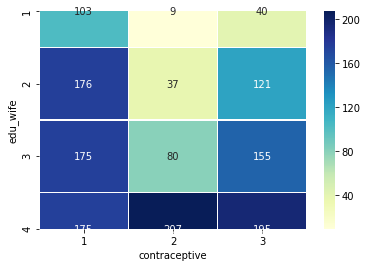

In [22]:
print('\nContraceptive and Wife Education\n')
edu_wife_effect = pd.crosstab(index = data['edu_wife'], columns = data['contraceptive'], margins=True, margins_name="Total")
edu_wife_effect.columns = ["no-use","long-term","short-term","rowtotal"]
edu_wife_effect.index= ["low","high1","high2","high3","coltotal"]
print('\nThe contingency (two-way frequency table) is given below\n')
print(edu_wife_effect)

print('\nNext we will calculate the prior probabilities(represented by values in the printed table) by dividing with the respective column totals\n')
print(edu_wife_effect/edu_wife_effect.loc["coltotal"])

print('\nNext we will calculate the posterior probabilities(represented by values in the printed table) by dividing with the respective row totals\n')
print(edu_wife_effect.div(edu_wife_effect["rowtotal"],axis=0))

print('\nNext we will represent the above contingency table in the form of heatmap using seaborn library \n')
edu_wife_effect1 = pd.crosstab(index = data['edu_wife'], columns = data['contraceptive'])
print(sns.heatmap(edu_wife_effect1,cmap = 'YlGnBu', linewidths=.5, annot=True, fmt='d'))
#sns.despine(left=True, bottom=True, right=True)

Clearly, the no. of no use of contraceptive remains unaffected by the education status of wife. But, use of short term methods like condoms, clearly has risen drastically with education which reflects more awareness about STDs and population control.


Contraceptive and Husband Education


The contingency (two-way frequency table) is given below

          no-use  long-term  short-term  rowtotal
low           31         10           3        44
high1         99         16          63       178
high2        161         50         141       352
high3        338        257         304       899
coltotal     629        333         511      1473

Next we will calculate the prior probabilities(represented by values in the printed table) by dividing with the respective column totals

            no-use  long-term  short-term  rowtotal
low       0.049285   0.030030    0.005871  0.029871
high1     0.157393   0.048048    0.123288  0.120842
high2     0.255962   0.150150    0.275930  0.238968
high3     0.537361   0.771772    0.594912  0.610319
coltotal  1.000000   1.000000    1.000000  1.000000

Next we will calculate the posterior probabilities(represented by values in the printed table) by dividing with the respective row totals

            

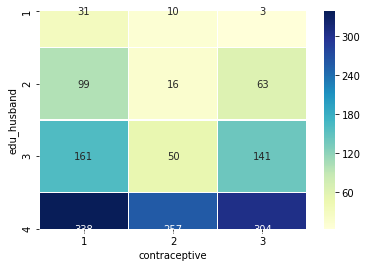

In [23]:
print('\nContraceptive and Husband Education\n')
edu_husband_effect = pd.crosstab(index = data['edu_husband'], columns = data['contraceptive'], margins=True, margins_name="Total")
edu_husband_effect.columns = ["no-use","long-term","short-term","rowtotal"]
edu_husband_effect.index= ["low","high1","high2","high3","coltotal"]
print('\nThe contingency (two-way frequency table) is given below\n')
print(edu_husband_effect)

print('\nNext we will calculate the prior probabilities(represented by values in the printed table) by dividing with the respective column totals\n')
print(edu_husband_effect/edu_husband_effect.loc["coltotal"])

print('\nNext we will calculate the posterior probabilities(represented by values in the printed table) by dividing with the respective row totals\n')
print(edu_husband_effect.div(edu_husband_effect["rowtotal"],axis=0))

print('\nNext we will represent the above contingency table in the form of heatmap using seaborn library \n')
edu_husband_effect1 = pd.crosstab(index = data['edu_husband'], columns = data['contraceptive'])
print(sns.heatmap(edu_husband_effect1,cmap = 'YlGnBu', linewidths=.5, annot=True, fmt='d'))
#sns.despine(left=True, bottom=True, right=True)

Same effect as wife education is observed in husband education.


Contraceptive and Religion


The contingency (two-way frequency table) is given below

           no-use  long-term  short-term  rowtotal
non-islam      75         76          69       220
islam         554        257         442      1253
coltotal      629        333         511      1473

Next we will calculate the prior probabilities(represented by values in the printed table) by dividing with the respective column totals

             no-use  long-term  short-term  rowtotal
non-islam  0.119237   0.228228    0.135029  0.149355
islam      0.880763   0.771772    0.864971  0.850645
coltotal   1.000000   1.000000    1.000000  1.000000

Next we will calculate the posterior probabilities(represented by values in the printed table) by dividing with the respective row totals

             no-use  long-term  short-term  rowtotal
non-islam  0.340909   0.345455    0.313636       1.0
islam      0.442139   0.205108    0.352753       1.0
coltotal   0.427020   0.226069    0.346911       1.0

Next

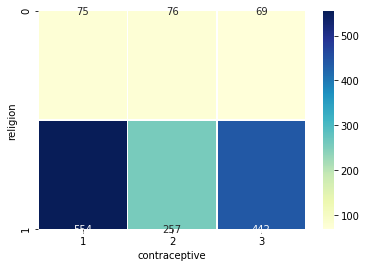

In [24]:
print('\nContraceptive and Religion\n')
religion_effect = pd.crosstab(index = data['religion'], columns = data['contraceptive'], margins=True, margins_name="Total")
religion_effect.columns = ["no-use","long-term","short-term","rowtotal"]
religion_effect.index= ["non-islam","islam","coltotal"]
print('\nThe contingency (two-way frequency table) is given below\n')
print(religion_effect)

print('\nNext we will calculate the prior probabilities(represented by values in the printed table) by dividing with the respective column totals\n')
print(religion_effect/religion_effect.loc["coltotal"])

print('\nNext we will calculate the posterior probabilities(represented by values in the printed table) by dividing with the respective row totals\n')
print(religion_effect.div(religion_effect["rowtotal"],axis=0))

print('\nNext we will represent the above contingency table in the form of heatmap using seaborn library \n')
religion_effect1 = pd.crosstab(index = data['religion'], columns = data['contraceptive'])
print(sns.heatmap(religion_effect1,cmap = 'YlGnBu', linewidths=.5, annot=True, fmt='d'))
#sns.despine(left=True, bottom=True, right=True)

As can be verified with high number of children in islam, same can be seen here as the proportion of islam wives in no contraceptive use is exceptionally high.


Contraceptive and Wife working status


The contingency (two-way frequency table) is given below

             no-use  long-term  short-term  rowtotal
working         170         89         110       369
not working     459        244         401      1104
coltotal        629        333         511      1473

Next we will calculate the prior probabilities(represented by values in the printed table) by dividing with the respective column totals

              no-use  long-term  short-term  rowtotal
working      0.27027   0.267267    0.215264  0.250509
not working  0.72973   0.732733    0.784736  0.749491
coltotal     1.00000   1.000000    1.000000  1.000000

Next we will calculate the posterior probabilities(represented by values in the printed table) by dividing with the respective row totals

               no-use  long-term  short-term  rowtotal
working      0.460705   0.241192    0.298103       1.0
not working  0.415761   0.221014    0.363225       1.0
coltotal     0.427020   0.226

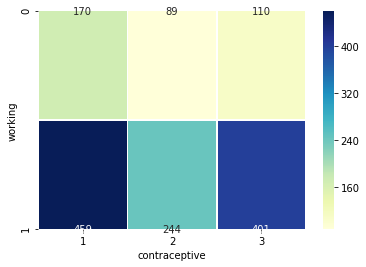

In [25]:
print('\nContraceptive and Wife working status\n')
working_effect = pd.crosstab(index = data['working'], columns = data['contraceptive'], margins=True, margins_name="Total")
working_effect.columns = ["no-use","long-term","short-term","rowtotal"]
working_effect.index= ["working","not working","coltotal"]
print('\nThe contingency (two-way frequency table) is given below\n')
print(working_effect)

print('\nNext we will calculate the prior probabilities(represented by values in the printed table) by dividing with the respective column totals\n')
print(working_effect/working_effect.loc["coltotal"])

print('\nNext we will calculate the posterior probabilities(represented by values in the printed table) by dividing with the respective row totals\n')
print(working_effect.div(working_effect["rowtotal"],axis=0))

print('\nNext we will represent the above contingency table in the form of heatmap using seaborn library \n')
working_effect1 = pd.crosstab(index = data['working'], columns = data['contraceptive'])
print(sns.heatmap(working_effect1,cmap = 'YlGnBu', linewidths=.5, annot=True, fmt='d'))
#sns.despine(left=True, bottom=True, right=True)

Clearly, there are more number of not working women, no clear effect can be observed.


Contraceptive and Husband job status


The contingency (two-way frequency table) is given below

          no-use  long-term  short-term  rowtotal
1            158        156         122       436
2            200         79         146       425
3            258         93         234       585
4             13          5           9        27
coltotal     629        333         511      1473

Next we will calculate the prior probabilities(represented by values in the printed table) by dividing with the respective column totals

            no-use  long-term  short-term  rowtotal
1         0.251192   0.468468    0.238748  0.295995
2         0.317965   0.237237    0.285714  0.288527
3         0.410175   0.279279    0.457926  0.397149
4         0.020668   0.015015    0.017613  0.018330
coltotal  1.000000   1.000000    1.000000  1.000000

Next we will calculate the posterior probabilities(represented by values in the printed table) by dividing with the respective row totals

           

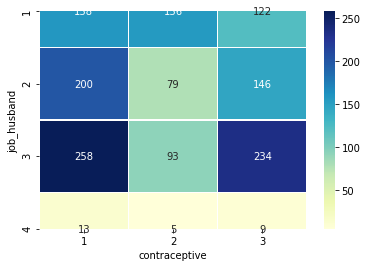

In [26]:
print('\nContraceptive and Husband job status\n')
job_husband_effect = pd.crosstab(index = data['job_husband'], columns = data['contraceptive'], margins=True, margins_name="Total")
job_husband_effect.columns = ["no-use","long-term","short-term","rowtotal"]
job_husband_effect.index= ["1","2","3","4","coltotal"]
print('\nThe contingency (two-way frequency table) is given below\n')
print(job_husband_effect)

print('\nNext we will calculate the prior probabilities(represented by values in the printed table) by dividing with the respective column totals\n')
print(job_husband_effect/job_husband_effect.loc["coltotal"])

print('\nNext we will calculate the posterior probabilities(represented by values in the printed table) by dividing with the respective row totals\n')
print(job_husband_effect.div(job_husband_effect["rowtotal"],axis=0))

print('\nNext we will represent the above contingency table in the form of heatmap using seaborn library \n')
job_husband_effect1 = pd.crosstab(index = data['job_husband'], columns = data['contraceptive'])
print(sns.heatmap(job_husband_effect1,cmap = 'YlGnBu', linewidths=.5, annot=True, fmt='d'))
#sns.despine(left=True, bottom=True, right=True)

No clear effect can be observed.


Contraceptive and Living standard


The contingency (two-way frequency table) is given below

          no-use  long-term  short-term  rowtotal
low           80          9          40       129
high1        117         30          82       229
high2        184         90         157       431
high3        248        204         232       684
coltotal     629        333         511      1473

Next we will calculate the prior probabilities(represented by values in the printed table) by dividing with the respective column totals

            no-use  long-term  short-term  rowtotal
low       0.127186   0.027027    0.078278  0.087576
high1     0.186010   0.090090    0.160470  0.155465
high2     0.292528   0.270270    0.307241  0.292600
high3     0.394277   0.612613    0.454012  0.464358
coltotal  1.000000   1.000000    1.000000  1.000000

Next we will calculate the posterior probabilities(represented by values in the printed table) by dividing with the respective row totals

            no

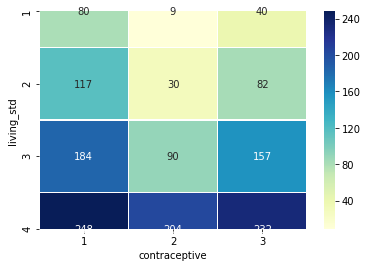

In [27]:
print('\nContraceptive and Living standard\n')
living_std_effect = pd.crosstab(index = data['living_std'], columns = data['contraceptive'], margins=True, margins_name="Total")
living_std_effect.columns = ["no-use","long-term","short-term","rowtotal"]
living_std_effect.index= ["low","high1","high2","high3","coltotal"]
print('\nThe contingency (two-way frequency table) is given below\n')
print(living_std_effect)

print('\nNext we will calculate the prior probabilities(represented by values in the printed table) by dividing with the respective column totals\n')
print(living_std_effect/living_std_effect.loc["coltotal"])

print('\nNext we will calculate the posterior probabilities(represented by values in the printed table) by dividing with the respective row totals\n')
print(living_std_effect.div(living_std_effect["rowtotal"],axis=0))

print('\nNext we will represent the above contingency table in the form of heatmap using seaborn library \n')
living_std_effect1 = pd.crosstab(index = data['living_std'], columns = data['contraceptive'])
print(sns.heatmap(living_std_effect1,cmap = 'YlGnBu', linewidths=.5, annot=True, fmt='d'))
#sns.despine(left=True, bottom=True, right=True)

Low living standard clearly coincides with less use of contraceptives. Among those with low living standards, no use of contraceptives is most common, whereas among the highest living standard people, all three contraceptive modes are equally likely.


Contraceptive and Media Exposure


The contingency (two-way frequency table) is given below

               no-use  long-term  short-term  rowtotal
good exposure     555        323         486      1364
bad exposure       74         10          25       109
coltotal          629        333         511      1473

Next we will calculate the prior probabilities(represented by values in the printed table) by dividing with the respective column totals

                 no-use  long-term  short-term  rowtotal
good exposure  0.882353    0.96997    0.951076  0.926001
bad exposure   0.117647    0.03003    0.048924  0.073999
coltotal       1.000000    1.00000    1.000000  1.000000

Next we will calculate the posterior probabilities(represented by values in the printed table) by dividing with the respective row totals

                 no-use  long-term  short-term  rowtotal
good exposure  0.406891   0.236804    0.356305       1.0
bad exposure   0.678899   0.091743    0.229358       1.0
coltotal

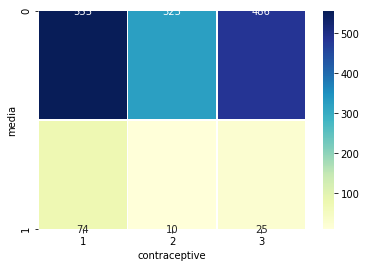

In [28]:
print('\nContraceptive and Media Exposure\n')
media_effect = pd.crosstab(index = data['media'], columns = data['contraceptive'], margins=True, margins_name="Total")
media_effect.columns = ["no-use","long-term","short-term","rowtotal"]
media_effect.index= ["good exposure","bad exposure","coltotal"]
print('\nThe contingency (two-way frequency table) is given below\n')
print(media_effect)

print('\nNext we will calculate the prior probabilities(represented by values in the printed table) by dividing with the respective column totals\n')
print(media_effect/media_effect.loc["coltotal"])

print('\nNext we will calculate the posterior probabilities(represented by values in the printed table) by dividing with the respective row totals\n')
print(media_effect.div(media_effect["rowtotal"],axis=0))

print('\nNext we will represent the above contingency table in the form of heatmap using seaborn library \n')
media_effect1 = pd.crosstab(index = data['media'], columns = data['contraceptive'])
print(sns.heatmap(media_effect1,cmap = 'YlGnBu', linewidths=.5, annot=True, fmt='d'))
#sns.despine(left=True, bottom=True, right=True)

Due to less data available for people with bad media exposure, nothing can be concluded.